# setup

In [1]:
import torch
import clip
from PIL import Image

import os
import skimage
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

from sklearn.cluster import KMeans

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# data

In [3]:
name = 'astronaut'

filename = name + '.png'
descriptions = {
    "page": "a page of text about segmentation",
    "chelsea": "a facial photo of a tabby cat",
    "astronaut": "a portrait of an astronaut with the American flag",
    "rocket": "a rocket standing on a launchpad",
    "motorcycle_right": "a red motorcycle standing in a garage",
    "camera": "a person looking at a camera on a tripod",
    "horse": "a black-and-white silhouette of a horse", 
    "coffee": "a cup of coffee on a saucer"
}

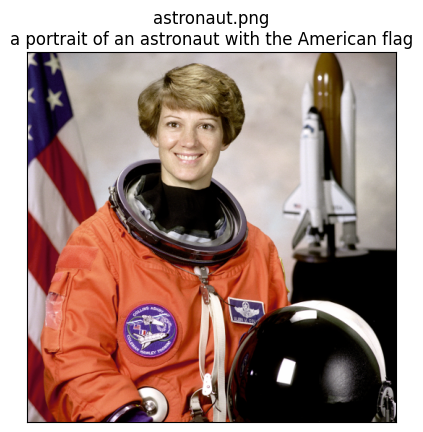

In [4]:
rgb_image = Image.open(os.path.join(skimage.data_dir, filename)).convert("RGB")
plt.imshow(rgb_image);
plt.title(f"{filename}\n{descriptions[name]}");
plt.xticks([]);
plt.yticks([]);

# model

In [5]:
# model, preprocess = clip.load("ViT-B/32", device = device)
model, preprocess = clip.load("RN50", device = device)

In [6]:
image = preprocess(Image.open(os.path.join(skimage.data_dir, filename))).unsqueeze(0).to(device)
text = clip.tokenize([descriptions[name]]).to(device)

# hist

In [10]:
with torch.no_grad():
    image_features = model.encode_image(image).cpu()
    text_features = model.encode_text(text).cpu()

In [11]:
image_features, image_features.shape

(tensor([[ 0.0123, -0.0535,  0.0381,  ..., -0.0397, -0.0491,  0.3120]],
        dtype=torch.float16),
 torch.Size([1, 1024]))

In [12]:
text_features, text_features.shape

(tensor([[-0.1027, -0.1976,  0.0142,  ..., -0.0972,  0.1615, -0.2262]],
        dtype=torch.float16),
 torch.Size([1, 1024]))

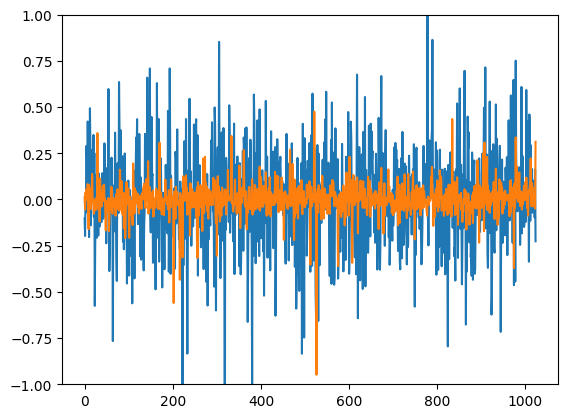

In [16]:
plt.plot(text_features[0, :]);
plt.plot(image_features[0, :]);

plt.ylim((-1, 1));

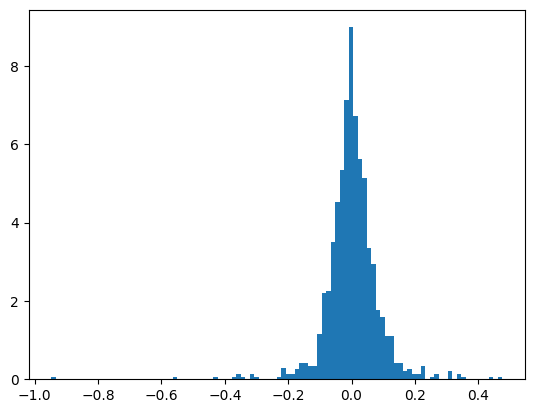

In [24]:
counts, bins = np.histogram(image_features[0, :], bins = 100)
plt.hist(bins[:-1], bins, weights=counts, density = True);

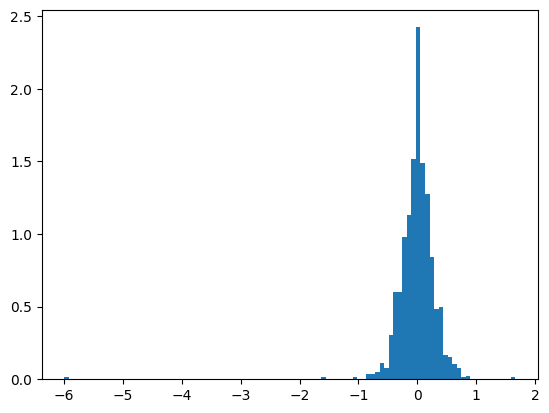

In [25]:
counts, bins = np.histogram(text_features[0, :], bins = 100)
plt.hist(bins[:-1], bins, weights=counts, density = True);

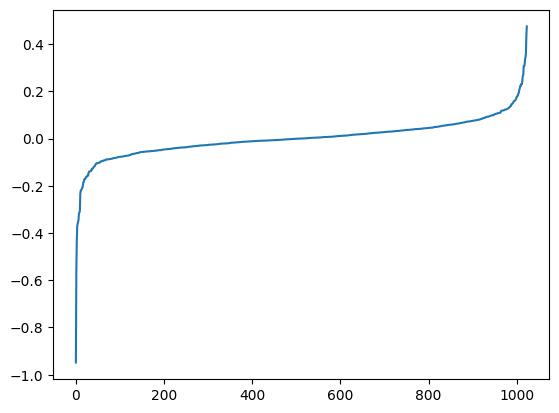

In [26]:
plt.plot(np.sort(image_features[0, :]));

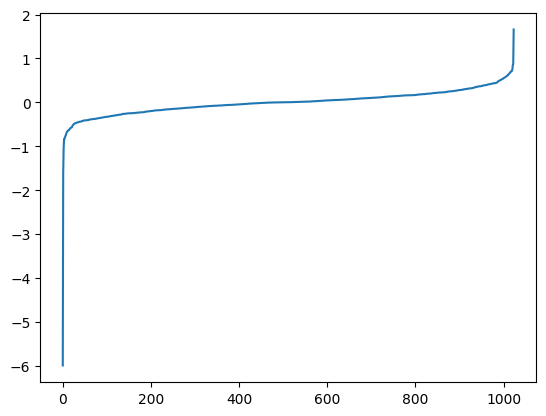

In [27]:
plt.plot(np.sort(text_features[0, :]));